In [1]:
# Schwefel_222
# In the paper Ngen=2000  NPAR=100
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100 # NUMBER OF PARTICLES
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

#TOTAL=ITE

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel_222'
Fun=Function.Schwefel_222

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [5]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [6]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [7]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [8]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [9]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [10]:
#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR



dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO

 




In [11]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    print('ite=',i,'total=50','time=',delta_time)
    
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
     

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      Maior=np.argmax(Fitness)
      Menor=np.argmin(Fitness)

      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 5.0071875254313154e-05
ite= 1 total=50 time= 11.26817983786265
ite= 2 total=50 time= 21.346379522482554
ite= 3 total=50 time= 34.141770021120706
ite= 4 total=50 time= 45.14484443267187
ite= 5 total=50 time= 56.29791898330053
ite= 6 total=50 time= 68.01853377819062
ite= 7 total=50 time= 79.94542405207952
ite= 8 total=50 time= 90.99687447150548
ite= 9 total=50 time= 103.0481562892596
ite= 10 total=50 time= 114.60272839069367
ite= 11 total=50 time= 125.73022261460622
ite= 12 total=50 time= 136.92026422421137
ite= 13 total=50 time= 147.914348423481
ite= 14 total=50 time= 158.18964351415633
ite= 15 total=50 time= 170.0635421593984
ite= 16 total=50 time= 181.90051212310792
ite= 17 total=50 time= 193.91744307279586
ite= 18 total=50 time= 205.62014391819636
ite= 19 total=50 time= 216.5576791683833
ite= 20 total=50 time= 227.51375130017598
ite= 21 total=50 time= 239.4834073106448
ite= 22 total=50 time= 251.34586223363877
ite= 23 total=50 time= 263.7647961537043
ite= 24 tot

In [12]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [13]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         3.117540e+01  9.856160e-01  0.000333         0.0      0.0  100.0   
1         3.002301e+01  9.491829e-01  0.000667         0.0      0.0  100.0   
2         2.956692e+01  9.347634e-01  0.001000         1.0      2.0  100.0   
3         2.875467e+01  9.090839e-01  0.001333         1.0      2.0  100.0   
4         2.810594e+01  8.885743e-01  0.001667         1.0      2.0  100.0   
5         2.774349e+01  8.771155e-01  0.002000         0.0      0.0  100.0   
6         2.739823e+01  8.662000e-01  0.002333         0.0      0.0  100.0   
7         2.692799e+01  8.513333e-01  0.002667         1.0      2.0  100.0   
8         2.641311e+01  8.350553e-01  0.003000         0.0      0.0  100.0   
9         2.577728e+01  8.149532e-01  0.003333         0.0      0.0  100.0   
10        2.530044e+01  7.998781e-01  0.003667         1.0      2.0  100.0   
11        2.463632e+01  7.788818e-01  0.004000         1.0      

In [20]:
print(NPAR)

100


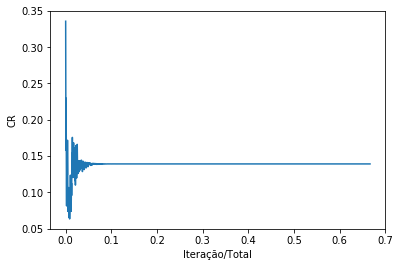

In [14]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

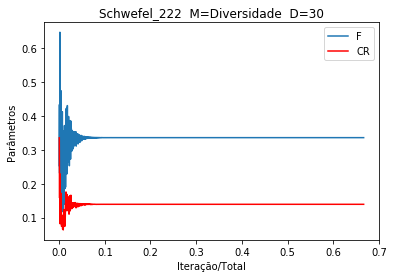

In [15]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


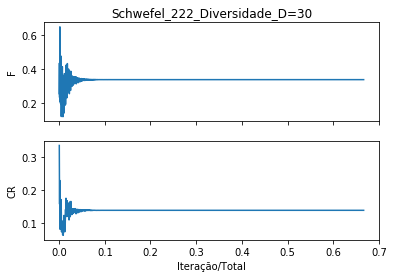

In [16]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [17]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)


DE_POP_VAR_F_CR TOTAL= 300000 Iterações= 2000 Dim= 30 Min/Max= -10 / 10 _ Schwefel_222
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-2000 

MÉDIA:  6.07259909055e-18
MIN __: 7.80202037674e-22
MAX__:  1.25299846703e-17
STD __: 4.04868610911e-18
Tempo Médio= 859.608 segundos ---
50 Rodadas

BEST:  [  3.48236827e-23   1.37961518e-24   5.62615410e-23  -5.40103297e-23
   1.74031390e-23  -3.30320277e-23  -3.92408571e-23   1.30029018e-23
  -3.84686732e-23  -1.19023759e-23   4.45651343e-23  -2.52507010e-24
  -3.00558836e-23  -4.59169822e-23  -1.44792873e-23   3.73469605e-23
   4.60183164e-23  -4.17056459e-23  -3.17139479e-23  -4.11075191e-24
  -6.32887058e-23  -2.43366361e-23  -2.30450129e-24  -5.79786351e-24
   1.08549726e-23   1.87472139e-23   2.11360853e-23  -1.55514583e-23
  -1.58971728e-23   4.32430490e-24   7.80202038e-22]


In [21]:
print(pd.DataFrame(XY))

              0             1             2             3             4   \
0   1.702773e-18 -6.255384e-20  4.305703e-19 -1.400599e-19 -9.776800e-20   
1   1.865900e-19  1.341200e-19 -2.371625e-20  3.586923e-20 -5.287441e-19   
2  -1.461098e-19  5.285246e-20  2.324693e-19  7.357806e-20 -1.192525e-19   
3   5.657274e-19 -9.915981e-20 -8.352559e-20 -2.442838e-20 -2.119755e-19   
4   1.337350e-18  1.748088e-19  5.838012e-19  3.778627e-21  1.266153e-19   
5  -7.959872e-19  1.444558e-19 -1.388568e-19 -7.211605e-20 -1.930782e-19   
6  -1.802806e-20 -6.181747e-20  4.271472e-20 -4.976968e-19 -7.264632e-19   
7  -4.077229e-19 -2.322657e-19 -9.519900e-20 -1.425737e-19 -8.611716e-19   
8  -1.849904e-19  2.592539e-19  9.489496e-20 -4.147260e-20 -2.168325e-19   
9   1.926882e-20  8.939696e-20 -2.659851e-20 -3.910365e-19  1.491571e-19   
10 -9.841686e-19  1.800118e-19  1.191223e-18  3.988404e-20  4.245835e-19   
11 -7.644058e-19 -1.392147e-19  1.762727e-19 -5.705651e-20  1.810274e-18   
12  1.082850

In [22]:
print(X)

              0             1             2             3             4   \
0   1.926882e-20  8.939696e-20 -2.659851e-20 -3.910365e-19  1.491571e-19   
1   2.020543e-18 -1.989059e-18 -8.502126e-20 -3.687456e-19  4.036191e-19   
2  -2.518133e-18 -3.679987e-19  1.676835e-19  1.553557e-19  1.464585e-19   
3  -3.943190e-19 -1.208804e-19 -4.292644e-19 -9.646487e-19 -2.954558e-18   
4  -5.178812e-20  2.882272e-19 -2.120328e-20  2.551332e-19  5.203969e-19   
5  -2.568532e-18 -1.744763e-19  6.795511e-20 -5.144771e-20 -1.283875e-18   
6   5.657274e-19 -9.915981e-20 -8.352559e-20 -2.442838e-20 -2.119755e-19   
7   3.864343e-19  9.133080e-19  2.973949e-20 -2.380348e-19 -1.156039e-17   
8  -1.849904e-19  2.592539e-19  9.489496e-20 -4.147260e-20 -2.168325e-19   
9  -4.432455e-18 -1.061627e-19  4.038027e-20  2.635140e-19 -7.871989e-19   
10 -1.216161e-17  2.646019e-19 -1.529872e-19  1.390379e-20 -1.138199e-19   
11 -1.222176e-18  2.806135e-20  1.670900e-19 -9.747026e-21 -1.609382e-19   
12 -5.673705